<center>
<h1>CSCI3151 - Foundations of Machine Learning - Fall 2024</h1>
<h2>Assignment 4</h2>
</center>


**Due on: <s>25 October</s> 27 October at 23:59 ADT**

- **Grade Period**: There is a 5-hour grace period after the deadline to allow for last minute technical issues.
- **Late Submissions:** You can submit the assignment up to 2 days late with a 20% penalty applied to your grade.
- **AI tools:** The policy on using AI tools is as discussed in class.
- **Working in Groups:** You may do this assignment alone or in groups of 2 or 3. If working in groups, only one person must submit it, and the assignment must clearly indicate the names and B-numbers and names of all group members.
- **Marking:** Marking notes (e.g. point values) will be added to this assignment next week, along with indication if we consider one or two of the questions as being somewhat harder.

[Assignment Submission Instructions as given on BrightSpace](https://dal.brightspace.com/d2l/le/content/342520/viewContent/4477501/View)

# Preamble

In this assignment you'll be working with logistic regression and neural networks (MLP). The test cases for most of the questions aren't designed to be comprehensive, they are just a guide. If you have more subtle errors, the tests cases may not find them.

1. This assignment is not hard but it requires careful coding, ensure you give this the time it needs.
2. Not only does it take time to actually write the code but a lot of this assignment will require you to run your code for a while. Especially Q3 and Q4, may take about 10 - 20 mins to actually train all your models.
3. It's very easy to make subtle bugs, ensure you are careful in every line of python code you write.
4. Q1,2 are related and Q3,4 are related. If you're stuck on Q1 or Q2, you can continue to do Q3 and Q4 while you think about your problem.

In [14]:
import numpy as np

# 1. Building a Logistic Regression Model

Remember that a logistic regression model is linear regression where we say everything to the right of $0$ is one class and everything to the left is another, and where we use a sigmoid function (to bound the output appropriately, and provide a smooth, differentiable loss).

Our classification is going to be done using the following equations:

$$
z = \mathbf{w}^\top \mathbf{x} + b \\
y = \sigma(z)
$$

Where the function $\sigma$ is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

## 1.1 Sigmoid Function

Remember, we want to be efficient with our operations. Your function should take in a `numpy.array` and apply this sigmoid function to all of those elements.

In [15]:
# GRADED FUNCTION
def sigmoid(z: np.array) -> np.array:
    '''
    Given an array of real numbers, apply the sigmoid function element-wise.
    Return:
        A numpy array of the same shape as z.
    '''
    return 1 / (1 + np.exp(-z))

### 1.1 Test Cases

In [16]:
# This is a simple test, not intended to be comprehensive

x = np.array([0, 1, 2, -1, -2, 0.001, 0.01, 3.1415, -3.1415, 100, -100])
y = sigmoid(x)
t = np.array([5.00000000e-01, 7.31058579e-01, 8.80797078e-01, 2.68941421e-01,
       1.19202922e-01, 5.00250000e-01, 5.02499979e-01, 9.58572489e-01,
       4.14275114e-02, 1.00000000e+00, 3.72007598e-44])

assert np.allclose(y, t, atol=1e-4), "sigmoid(x) didn't work for all numbers in x."

"All tests passed"

'All tests passed'

## 1.2 Forward Direction

We now actually have everything we would need to compute the foward pass of our logistic regression model. Note that this function will perform a matrix multipication to compute the value for each of the individual units.

In [17]:
# GRADED FUNCTION
def log_bin_forward(X: np.array, w: np.array, b: float) -> np.array:
    '''
    logistic regression, binary classification, forward pass.
    Parameters:
        X: (N, D) numpy array
        w: (D, 1) numpy array
        b: float
    Return:
        y: (N, 1) numpy array
    '''

    z = np.dot(X, w) + b
    y = sigmoid(z)

    return y

### 1.2 Test cases

In [18]:
# These are simple tests, not intended to be comprehensive

X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([[0.5], [-0.5]])
b = 0.0
t = np.array([[0.37754067], [0.37754067], [0.37754067]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([[0.0], [0.0]])
b = 0.0
t = np.array([[0.5], [0.5], [0.5]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 1], [2, 2]])
w = np.array([[10], [10]])
b = 5.0
t = np.array([[1.], [1.]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 1], [2, 2]])
w = np.array([[-10], [-10]])
b = -5.0
t = np.array([[1.38879439e-11], [2.86251858e-20]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[0, 0], [0, 0]])
w = np.array([[0.0], [0.0]])
b = 1.0
t = np.array([[0.73105858], [0.73105858]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

"All Tests Passed"

'All Tests Passed'

## 1.3 Loss Function

Before we can perform backpropagation for a given set of inputs and weights, we need to decide on a loss function that this gradient will correspond to. Usually, we use cross-entropy loss when performing logistic regression, so let's use that here.

$$
L_{CE}(y, t) = -t \ln (y) - (1-t) \ln(1-y)
$$

In [19]:
# GRADED FUNCTION
def cross_entropy_loss(y: np.array, t: np.array) -> float:
    """
    Compute the cross-entropy loss. Note that since you are provided arrays
    rather than a single points, this is actually the cost function.

    Parameters:
        y: (N, 1) numpy array of predicted probabilities (values between 0 and 1).
        t: (N, 1) numpy array of true labels (0 or 1).

    Returns:
        loss: Cross-entropy loss as a float.
    """
    # We do this to ensure we never hit log(0)
    epsilon = 1e-15
    y = np.clip(y, epsilon, 1 - epsilon)

    # your code here
    loss = -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))

    return loss

### 1.3 Test Cases

In [20]:
t = np.array([0, 1, 0, 1])
y = np.array([0.1, 0.9, 0.2, 0.8])
loss = cross_entropy_loss(y, t)
exp = 0.164252033486018
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([0,0,0,0,0,1,1,1,1,1])
y = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 0.3085156449913465
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([1, 1,1,1,1,1,1,1,1,1,1])
y = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 3.8600195228886935
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([0,0,0,0,0,0,0,0,0,0,0])
y = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 3.8600922135641658
assert np.isclose(loss, exp, atol=10e-4)

"All Tests Passed"

'All Tests Passed'

## 1.4 Gradients

Now we have everything we need to find the gradient. To calculate the gradient, we need the derivative of the loss with respect to a particular weight parameter. We'll give you the final answer here but we recommend you try to do the derivation yourself.

$$
\frac{\partial L_{CE}}{\partial w_j} = (y - t) \cdot x_j
$$

In [21]:
# GRADED FUNCTION
def log_bin_backward(X: np.array, y: np.array, t: np.array, w: np.array, b: float) -> np.array:
    '''
    logistic regression, binary classification, backprop.
    Parameters:
        X: (N, D) numpy array
        y: (N, 1) numpy array
        t: (N, 1) numpy array
        w: (D, 1) numpy array
        b: float
    Return:
        dw: (D, 1) numpy array
        db: float
    '''
    N = X.shape[0]

    error = (y - t)

    dw = -np.dot(X.T, error)/N
    db = -np.sum(error)/N

    return dw, db

### 1.4 Test Cases

In [22]:
X = np.array(
    [
        [1.26658442, -1.02050719],
        [-0.98437831, 0.27607749],
        [-1.32136078, -1.26195146],
        [0.49447882, 1.38227184],
        [-1.33470097, -2.00844646],
    ]
)
t = np.array([[1], [0], [0], [1], [0]])

y = np.array([[0.81729993], [0.02683276], [0.00764113], [0.58255813], [0.00593826]])
w = np.array([[2.43169314], [0.29659293]])
b = -1.279109137189912
dw_exp = np.array([[0.09645146], [0.08094658]])
db_exp = 0.11194595724150591

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(dw, dw_exp, atol=1e-4)
assert np.isclose(db, db_exp, atol=1e-4)

y = np.array([[0.85441441], [0.02853752], [0.0062232], [0.69070388], [0.00435393]])
w = np.array([[2.60359904], [0.43450242]])
b = -1.0846129735508365
dw_exp = np.array([[0.07589256], [0.05753592]])
db_exp = 0.0831534116965434

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(dw, dw_exp, atol=1e-4)
assert np.isclose(db, db_exp, atol=1e-4)


y = np.array([[0.87969946], [0.02963325], [0.00530132], [0.76073603], [0.00343621]])
w = np.array([[2.7415787], [0.53434795]])
b = -0.9375477440982641
dw_exp = np.array([[0.06228867], [0.04267413]])
db_exp = 0.0642387455552448

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(dw, dw_exp, atol=1e-4)
assert np.isclose(db, db_exp, atol=1e-4)


y = np.array([[0.89786906], [0.03030304], [0.00464924], [0.80744823], [0.00284379]])
w = np.array([[2.856671], [0.60987594]])
b = -0.8220637356800282
dw_exp = np.array([[0.05286777], [0.03302925]])
db_exp = 0.051377327219592296

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(dw, dw_exp, atol=1e-4)
assert np.isclose(db, db_exp, atol=1e-4)

## 1.5 Combining Everything

We're now going to combine everything to create a logistic regression model! Remember to use the functions you just wrote, don't just rewrite the details.

In [23]:
# GRADED CLASS
class LogisticRegression():
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X: np.array, t: np.array, lr: float, epochs: int):
        # Initialize w and b to random weights
        # I recommend using np.random.randn

        self.w = np.random.randn(X.shape[1]).reshape(-1, 1)
        self.b = np.random.randn()


        t = t.reshape(-1, 1)
        loss_array = []

        for i in range(epochs):
            # Forward
            y = log_bin_forward(X, self.w, self.b)
            loss = cross_entropy_loss(y,t)
            loss_array.append(loss)


            # Backward
            dw, db = log_bin_backward(X, y, t, self.w, self.b)

            # Update

            self.w += dw*lr
            self.b += db*lr


        return loss_array

    def predict(self, X: np.array) -> np.array:

        y = log_bin_forward(X, self.w, self.b)

        return y


### 1.5 Test Cases

Here we use the model you just created to see how well it performs on a given dataset.

In [24]:
def graph_points(X, y, label="Class"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label="Class 1")
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label="Class 2")
    plt.title(f'{label}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def graph_loss(loss_array):
    plt.figure(figsize=(8, 6))
    plt.plot(loss_array, label='Loss over epochs', color='green')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


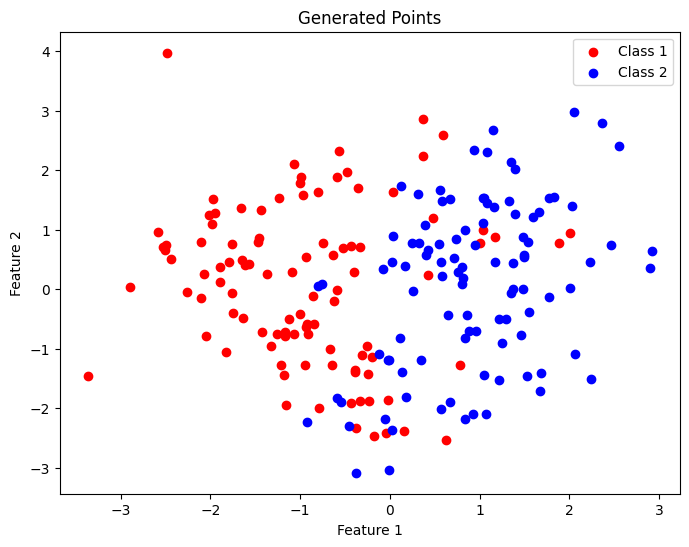

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, t = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
t = t.reshape(-1, 1)

graph_points(X,t, "Generated Points")

In [26]:
model = LogisticRegression()
epochs = 100
learning_rate = 0.1

# Fit the model
loss_array = model.fit(X, t, learning_rate, epochs)

y_pred = model.predict(X) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t, y_pred)
accuracy

0.86

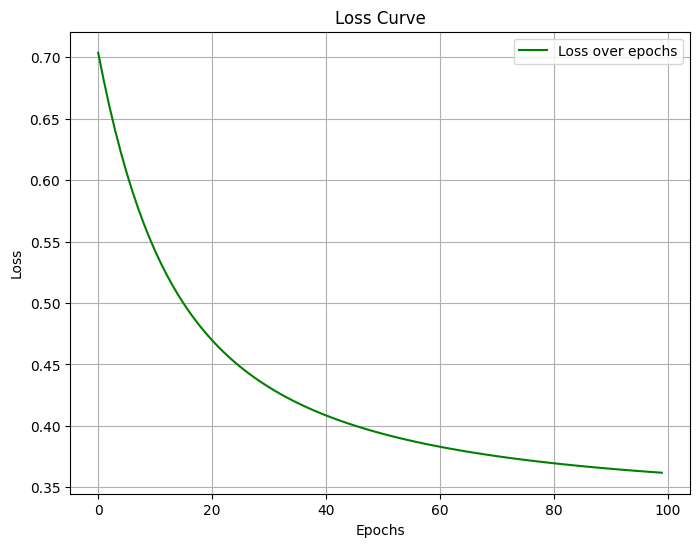

In [27]:
# Plot the loss over epochs
graph_loss(loss_array)

## 1.6 Testing the Model

You now have a logistic regression model. Demonstate that you know it's capabilities and limitations in the following way:

1. Create a dataset for which logistic regression **works well**.
2. Create a dataset for which logistic regression **doesn't work well**.

Explain why you see the behaviour for each of those datasets. You should use graphs to make your case (plotted points, and loss graph).

Constraints:
1. At least 100 datapoint and not more than 300 points
2. Must be 2D points that can be visuallized on a graph.
3. A human should be able to classify the points (you can't just make the points overlap or very noisy).

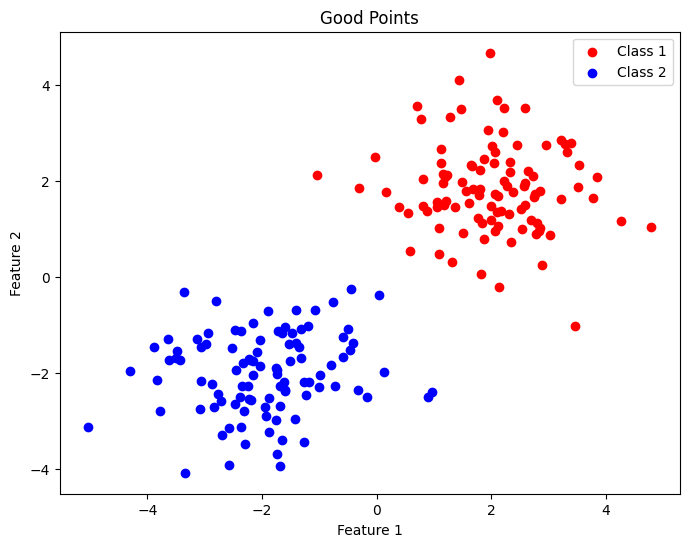

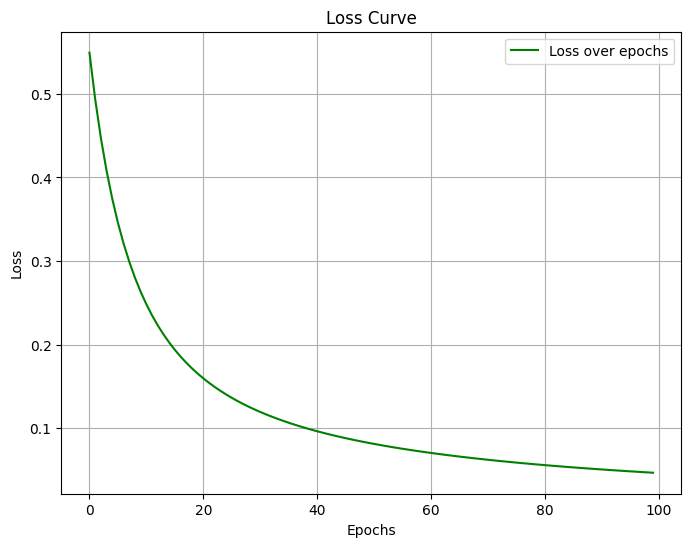

0.99


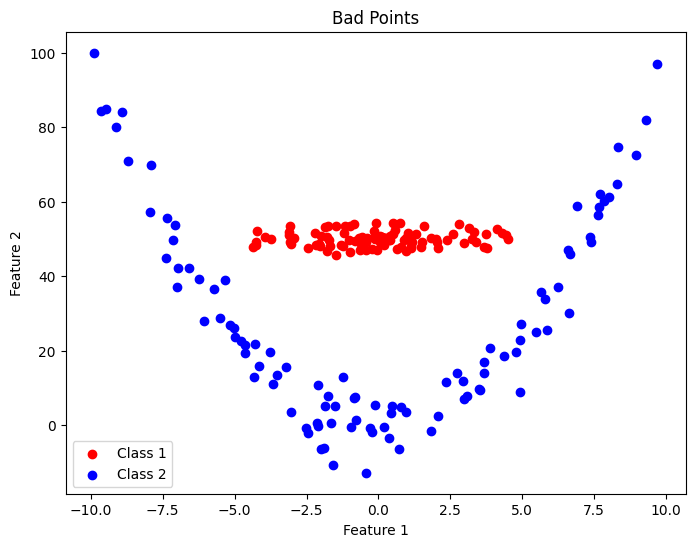

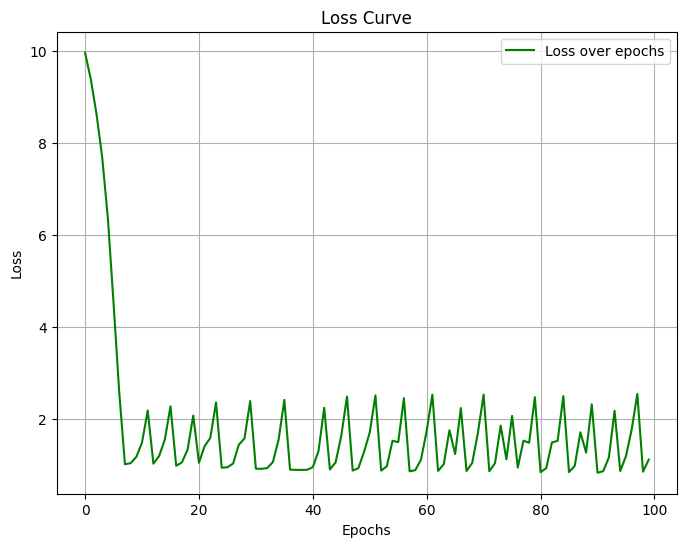

0.51


In [28]:
# Your code here
X0 = np.random.randn(100, 2) + np.array([2, 2])
# Class 1
X1 = np.random.randn(100, 2) + np.array([-2, -2])

# Combine data
X = np.vstack((X0, X1))
t = np.array([0] * 100 + [1] * 100)

graph_points(X,t, "Good Points")

model = LogisticRegression()
epochs = 100
learning_rate = 0.1

# Fit the model
loss_array = model.fit(X, t, learning_rate, epochs)

y_pred = model.predict(X) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t, y_pred)
graph_loss(loss_array)
print(accuracy)

'''
from assn3

'''
import random

def noise(mean, standard_deviation):
    return random.gauss(mean, standard_deviation)

# GRADED FUNCTION
def generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1], theta=0.5, sigma=0.5):
    # your code here
    random_x = np.random.uniform(xmin, xmax, n)
    random_y = np.zeros_like(random_x)
    for i, coeff in enumerate(coeffs):
      random_y += coeff * random_x**i
    random_y += np.array([noise(theta, sigma) for _ in range(n)])
    result = np.column_stack((random_x, random_y))
    return result

X_0 = generate_poly_noisy(100, -10, 10, coeffs=[0,0,1], theta=0, sigma=5)
t_0 = np.ones(100)

angles = np.linspace(0, 2 * np.pi, 100)
radii = np.random.rand(100) * 5  # Random radii less than 5 to stay inside the circle
X_1 = np.column_stack((radii * np.cos(angles), 50+radii * np.sin(angles)))  # Inside circle for Class 0
t_1 = np.zeros(100)

# Combine data
X = np.vstack((X_0, X_1))
t = np.concatenate((t_0, t_1))

graph_points(X,t, "Bad Points")

model = LogisticRegression()
epochs = 100
learning_rate = 0.01

# Fit the model
loss_array = model.fit(X, t, learning_rate, epochs)

y_pred = model.predict(X) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t, y_pred)
graph_loss(loss_array)
print(accuracy)

### 1.6 Written Answer

For points that can be seprated by a line logistic regression model would work really well. For example the dataset "Good Points", it has the accuracy up to 99%. And the loss curve has been going down. Meaning the model is not facing any difficulities, meeting any confusing parts.

When the decision boundary is not liner the logistic regression model would not work well. For example the dataset "Bad Points", it has the accuracy about 51.5%. The loss curve is going up and down. Meaning the model is tring to improve but failed to find any progress.

# 2. Neual Networks

Now that you know how to build a logistic regression model, you can extend this to be a neural network without a lot of work. Now we will have mutliple layers, allowing us to build more complex models.



## 2.1 Activation Functions

Create activation functions and their derivatives. Remember to vectorize your functions.

In [29]:
# GRADED SECTION

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_derivative(x):
    return 1

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "softmax": (softmax, softmax_derivative),
    "relu": (relu, relu_derivative),
    "tanh": (tanh, tanh_derivative)
}

## 2.2 Building the NN

We want to be able to create neural network in the following way:

```python
layers = [
    Layer(4, "relu"),
    Layer(4, "sigmod"),
    Layer(4, "relu"),
    Layer(2, "softmax")
]

model = NeuralNet(layers)
epochs = 1000
learning_rate = 0.1
loss_array = model.fit(X, t, epochs, learning_rate)
```

Tips:

1. Keep track of the shape of all your vectors and matrices.
2. Watch how the model does over time, do you expect this behaviour?
3. It may be useful to graph stuff like `loss_array[300:]` since the inital loss may be to high to see details of the later parts of training.

> NOTE: I've provided a bit of structure to some of the methods in the class but if you want to do it differently, that is okay. The structure is only there to assist you, not to be in your way.

In [30]:
class Layer:
    def __init__(self, hidden_nodes: int, activation: str) -> None:
        self.nodes = hidden_nodes
        self.act, self.der = activation_functions[activation]

In [31]:
class NeuralNet:
    def __init__(self, layers: list[Layer]) -> None:
        self.layers = layers
        self.weights = []
        self.biases = []

    def init_weights(self, X):
        """
        Initialize weights and biases for each layer based on input data.

        Parameters:
            X: (N, D) numpy array of input data
        """

        # In between each layer you have a weight matrix and a bias vector.

        # you should initialize the weights using np.random.randn and initalize
        # the biases to either 0 or randn. I've provided a bit of structure to
        # help you out, but if you want to do this differently, you can rewrite
        # the whole method, you don't have to use this structure.

        self.weights.append(np.random.randn(X.shape[1], self.layers[0].nodes))
        self.biases.append(np.zeros((1, self.layers[0].nodes)))

        for i in range(1, len(self.layers)):
            self.weights.append(np.random.randn(self.layers[i-1].nodes, self.layers[i].nodes))
            self.biases.append(np.zeros((1, self.layers[i].nodes)))

    def one_hot_encode(self, t, num_classes):
        """
        One-hot encode the target variable t.

        Parameters:
            t: (N,) numpy array of class labels
            num_classes: the number of unique classes

        Returns:
            one_hot: (N, num_classes) numpy array where each row is one-hot encoded
        """
        one_hot = np.zeros((t.shape[0], num_classes))
        one_hot[np.arange(t.shape[0]), t] = 1
        return one_hot

    def forward_pass(self, X):
        """
        Perform a forward pass through the network.

        Parameters:
            X: (N, D) numpy array of input data

        Returns:
            y: (N, M) numpy array of network output after the final layer
        """
        a = X
        self.activations = [a]
        self.logits = []

        for layer, W, b in zip(self.layers, self.weights, self.biases):

            z = np.dot(a, W) + b
            a = layer.act(z)

            self.logits.append(z)
            self.activations.append(a)

        self.y = a
        return self.y

    def backward_pass(self, X, t):
        """
        Perform a backward pass through the network to compute gradients.

        Parameters:
            X: (N, D) numpy array of input data
            t: (N, num_classes) numpy array of one-hot encoded target labels

        Returns:
            w_grads: list of weight gradients for each layer
            b_grads: list of bias gradients for each layer
        """
        N = X.shape[0]

        delta = self.y - t

        w_grads = []
        b_grads = []

        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            z = self.logits[i]
            a = self.activations[i]

            delta = delta * layer.der(z)

            dw = np.dot(self.activations[i].T, delta) / N
            db = np.sum(delta, axis=0, keepdims=True) / N

            w_grads.insert(0, dw)
            b_grads.insert(0, db)

            if i > 0:
                # if not first layer, propagate error
                W = self.weights[i]
                delta = np.dot(delta, W.T)

            #print(w_grads)
            #print(w_grads[0])
        return w_grads, b_grads

    def update_weights(self, w_grads, b_grads, learning_rate):
        """
        Update the weights and biases of the network using the computed gradients.

        Parameters:
            w_grads: list of weight gradients for each layer
            b_grads: list of bias gradients for each layer
            learning_rate: float, the learning rate for gradient descent
        """
        for i in range(len(self.layers)):
            dW, db = w_grads[i], b_grads[i]
            #print(dW,i)
            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * db

    def fit(self, X, t, epochs, learning_rate):
        """
        Train the neural network on the given data.

        Parameters:
            X: (N, D) numpy array of input data
            t: (N,) numpy array of target class labels
            epochs: int, number of training epochs
            learning_rate: float, the learning rate for gradient descent

        Returns:
            loss_array: list of loss values computed at each epoch
        """

        loss_array = []
        t = t.astype(int)  # ensure ints
        t = t.reshape(-1)  # flatten for one-hot-encode function
        num_classes = np.unique(t).size


        # use function from above here.
        t_one_hot = self.one_hot_encode(t, num_classes)

        self.init_weights(X)

        for _ in range(epochs):
            # your code here (~3-5 lines)
            y = self.forward_pass(X)
            loss_array.append(cross_entropy_loss(y, t_one_hot))
            w_grads, b_grads = self.backward_pass(X,t_one_hot)
            self.update_weights(w_grads, b_grads, learning_rate)

        return loss_array

    def predict(self, X):
        """
        Predict class labels for the given input data.

        Parameters:
            X: (N, D) numpy array of input data

        Returns:
            predictions: (N,) numpy array of predicted class labels
        """

        y_pred = self.forward_pass(X)

        # convert from one-hot back to classes
        return np.argmax(y_pred, axis=1)


## 2.3 Test your Model

You should test your model against the datasets you used for logistic regression. See if you can create a NN that can classify the dataset that you couldn't classify using logistic regression. I also recommend trying an XOR dataset to actually see your model do cool things!

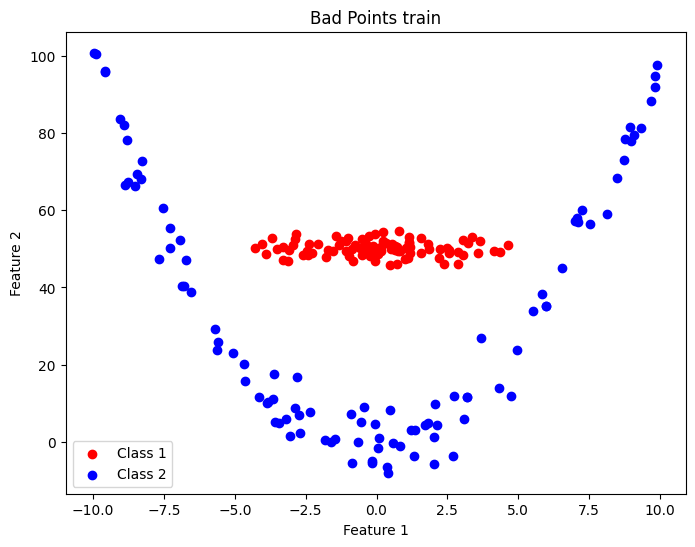

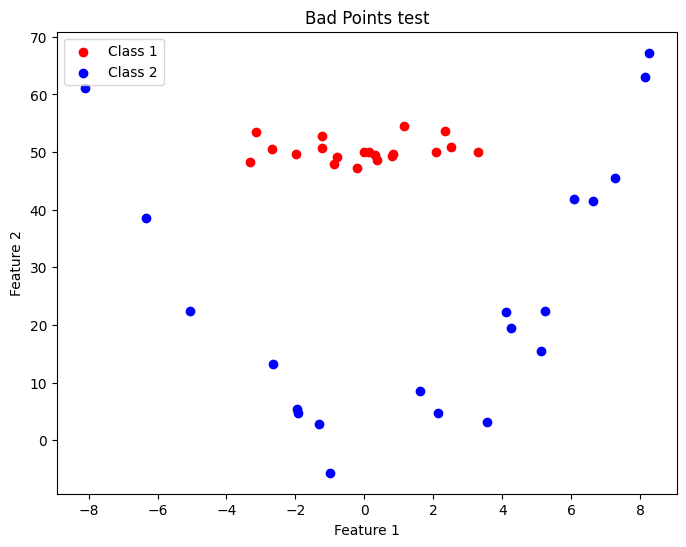

In [32]:
# your code here

# this section for dataset prep

import random

def noise(mean, standard_deviation):
    return random.gauss(mean, standard_deviation)

# GRADED FUNCTION
def generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1], theta=0.5, sigma=0.5):
    # your code here
    random_x = np.random.uniform(xmin, xmax, n)
    random_y = np.zeros_like(random_x)
    for i, coeff in enumerate(coeffs):
      random_y += coeff * random_x**i
    random_y += np.array([noise(theta, sigma) for _ in range(n)])
    result = np.column_stack((random_x, random_y))
    return result

X_0 = generate_poly_noisy(100, -10, 10, coeffs=[0,0,1], theta=0, sigma=5)
t_0 = np.ones(100)

angles = np.linspace(0, 2 * np.pi, 100)
radii = np.random.rand(100) * 5  # Random radii less than 5 to stay inside the circle
X_1 = np.column_stack((radii * np.cos(angles), 50+radii * np.sin(angles)))  # Inside circle for Class 0
t_1 = np.zeros(100)

# Combine data
X_train = np.vstack((X_0, X_1))
t_train = np.concatenate((t_0, t_1))

graph_points(X_train,t_train, "Bad Points train")

X_0 = generate_poly_noisy(20, -10, 10, coeffs=[0,0,1], theta=0, sigma=5)
t_0 = np.ones(20)
angles = np.linspace(0, 2 * np.pi, 20)
radii = np.random.rand(20) * 5  # Random radii less than 5 to stay inside the circle
X_1 = np.column_stack((radii * np.cos(angles), 50+radii * np.sin(angles)))  # Inside circle for Class 0
t_1 = np.zeros(20)
X_test = np.vstack((X_0, X_1))
t_test = np.concatenate((t_0, t_1))
graph_points(X_test,t_test, "Bad Points test")


#model = LogisticRegression()
#epochs = 100
#learning_rate = 0.01
#loss_array = model.fit(X, t, learning_rate, epochs)
#y_pred = model.predict(X) >= 0.5  # Convert probabilities to binary predictions
#accuracy = accuracy_score(t, y_pred)
#graph_loss(loss_array)
#print(accuracy)


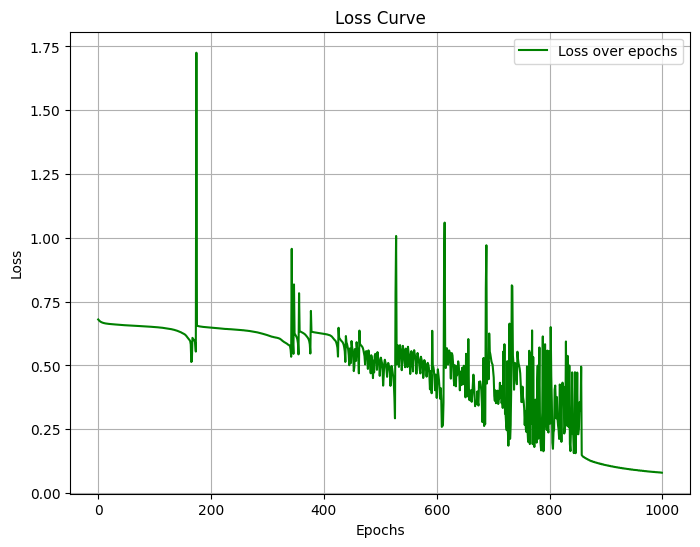

0.985


In [34]:
# your code here
layers = [
    Layer(4, "relu"),
    Layer(4, "sigmoid"),
    Layer(4, "relu"),
    Layer(2, "softmax")
]

model = NeuralNet(layers)
epochs = 1000
learning_rate = 0.1
loss_array = model.fit(X_train, t_train, epochs, learning_rate)
y_pred = model.predict(X_train) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t_train, y_pred)
graph_loss(loss_array)
print(accuracy)

# this section for NN training

In [35]:
# your code here
y_pred = model.predict(X_test) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t_test, y_pred)
accuracy
# this section for NN testing

1.0

# 3. Neural Network Experiments

The rest of this assignment is going to be on the practical side of things. We'll be using the `keras` neural network to solve classification problems.

In this question you will experiment with a neural network in the context of image classification, where a image can belong to one out of several possible categories. The main goal for you is to try different hyperparameters in a systematic manner so that you can propose a network configuration that is properly justified. You will experiment with the [MNIST digits](https://keras.io/api/datasets/mnist/), which can be loaded directly from Keras:

```python
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [40]:
import tensorflow as tf
from keras.datasets import mnist
from keras import layers, models
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize values
X_train = X_train / 255
X_test = X_test / 255

Build a sequential model using `keras.models.Sequential` and add dense layers and experiment with it. Compile and train the model.

In [122]:
# Building and Training the Model

model = models.Sequential()
model.add(layers.Input((28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8706 - loss: 0.4524 - val_accuracy: 0.9620 - val_loss: 0.1299
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9656 - loss: 0.1118 - val_accuracy: 0.9690 - val_loss: 0.1013
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9688 - val_loss: 0.1048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9704 - val_loss: 0.1070
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9698 - val_loss: 0.1143
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9712 - val_loss: 0.1048
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9898 - loss: 0.0305 - val_accuracy: 0.9732 - val_loss: 0.0987
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss:

In [84]:
# evaluate your model by running the code below
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9662 - loss: 0.1312
Test score: 0.11287811398506165
Test accuracy: 0.9713000059127808


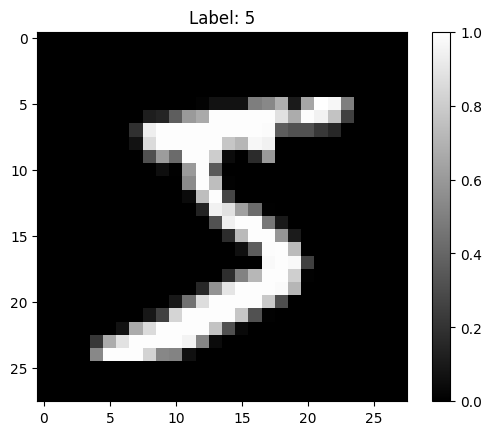

In [85]:
def display_image(x, y):
    '''
    You can use this function to view the individual images in the dataset.
    '''
    plt.imshow(x, cmap='gray')
    plt.title(f'Label: {y}')
    plt.colorbar()
    plt.show()


display_image(X_train[0], y_train[0])

## 3.1 Separate Validation and Test Sets

As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:

```
80% train, 10% val, 10% test
```

Use the mentioned ratios to split the data and train the model using these portions. For each one of your experiments, train the model and report the loss and accuracy of model on the training and validation set. (for more information check this [link](https://scikit-learn.org/stable/modules/learning_curve.html#:~:text=2.-,Learning%20curve,error%20or%20a%20bias%20error.))  

> Note: since the dataset is already split into train and test sets for you, you should concatenate and shuffle the two sets before splitting them again to achieve the ratios you want

In [41]:
# Your code here
X = np.vstack((X_train, X_test))
t = np.hstack((y_train, y_test))

total_size = X.shape[0]
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)
test_size = total_size - train_size - val_size

all_indices = np.arange(total_size)

train_indices = np.random.choice(all_indices, size=train_size, replace=False)
remaining_indices = np.setdiff1d(all_indices, train_indices)

val_indices = np.random.choice(remaining_indices, size=val_size, replace=False)
test_indices = np.setdiff1d(remaining_indices, val_indices)

    # Split the data
X_train, t_train = X[train_indices], t[train_indices]
X_val, t_val = X[val_indices], t[val_indices]
X_test, t_test = X[test_indices], t[test_indices]
print(X.shape[0], t.shape[0])
print(X_train.shape[0], t_train.shape[0])
print(X_val.shape[0], t_val.shape[0])
print(X_test.shape[0], t_test.shape[0])

70000 70000
56000 56000
7000 7000
7000 7000


## 3.2 Experiments

Experiment with different hyperparameters and report your best accuracy found. The most important hyperparameters that you need to experiment with in this question part are:

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

Perform at least three experiments, being sure to vary only one hyperparameter at a time. To select the best choice of hyperparameters, draw the loss and accuracy curve. Create a table to display your results in a clean way.

In [136]:
# your experiments here
# create cells and functions to make your experimentation easier.
################################################################################### experiment 1:double epochs
model = models.Sequential()
model.add(layers.Input((28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, t_train, epochs=20, batch_size=32, validation_data=(X_val, t_val))
score = model.evaluate(X_test, t_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

################################################################################### experiment 2: diff nodes per layer
model = models.Sequential()
model.add(layers.Input((28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, t_train, epochs=10, batch_size=32, validation_data=(X_val, t_val))
score = model.evaluate(X_test, t_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

################################################################################### experiment 3: 5 layer
model = models.Sequential()
model.add(layers.Input((28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, t_train, epochs=10, batch_size=32, validation_data=(X_val, t_val))
score = model.evaluate(X_test, t_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8716 - loss: 0.4491 - val_accuracy: 0.9560 - val_loss: 0.1422
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9673 - loss: 0.1088 - val_accuracy: 0.9671 - val_loss: 0.1070
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9786 - loss: 0.0697 - val_accuracy: 0.9706 - val_loss: 0.0983
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9828 - loss: 0.0525 - val_accuracy: 0.9709 - val_loss: 0.0911
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9686 - val_loss: 0.1072
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9756 - val_loss: 0.0904
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9731 - val_loss: 0.0992
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9938 - loss: 0.01

Best accuracy: experiment 1:double epochs

accuracy: 0.9782857298851013

# 4. Tuning Generalization

In this question you will construct a neural network to classify a large set of low resolution images. Different from Q3, in this case we suggest a neural network to start experimenting with, but we would like you to describe the behavior of the network as you modify certain parameters. You will be reproducing some concepts mentioned during the lectures, such as when we show how generalization changes as the number of parameters are changed.

## 4.1 Initial Model

Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```
to train a neural network with **two hidden layers using the logistic activation function, with 500 and 200 hidden nodes, respectively**. The output layer should be defined according to the nature of the targets.

Generate a plot that shows average precision for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> Hint: Keras' `history` callback may be a helpful utility here.

In [44]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0

In [47]:
from keras import utils

# Quickly check the shape of input and output
print(x_train_original[0].shape, x_train_original.shape)
print(y_train_original[0], y_train_original.shape)
print(y_train_original[:10].T)

# looks like its a 32x32 image with 3 values for each of
# those pixels (rgb)

# The dataset ( from https://www.cs.toronto.edu/~kriz/cifar.html ) contains
# color images with 100 classes with each class containing 600 images

y_train = utils.to_categorical(y_train_original)
y_test = utils.to_categorical(y_test_original)

(32, 32, 3) (50000, 32, 32, 3)
[19] (50000, 1)
[[19 29  0 11  1 86 90 28 23 31]]


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.0407 - loss: 4.4022 - val_accuracy: 0.1025 - val_loss: 3.8490
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.1146 - loss: 3.7797 - val_accuracy: 0.1380 - val_loss: 3.6809
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.1470 - loss: 3.6056 - val_accuracy: 0.1617 - val_loss: 3.5757
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.1672 - loss: 3.5000 - val_accuracy: 0.1648 - val_loss: 3.5424
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.1846 - loss: 3.4071 - val_accuracy: 0.1703 - val_loss: 3.5083
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.2018 - loss: 3.3311 - val_accuracy: 0.1870 - val_loss: 3.4359
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.2100 - loss: 3.2707 - val_accuracy: 0.1954 - val_loss: 3.3989
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.2192 -

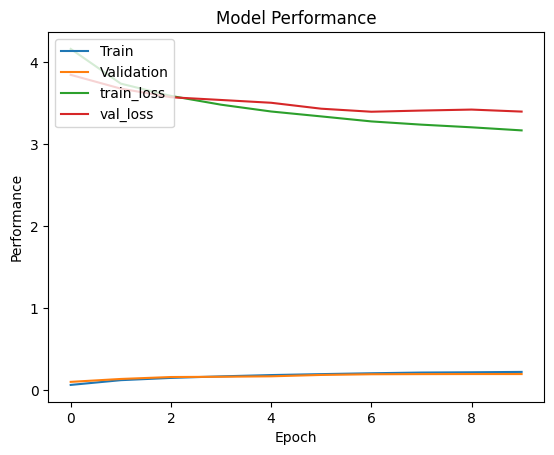

In [143]:
# Your code here

# Create the model as described
# Perform experiments
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_original, y_train, epochs=10, batch_size=32, validation_split=0.2)

score = model.evaluate(x_test_original, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Performance')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','train_loss','val_loss'], loc='upper left')
plt.show()


## 4.2 Average Precision based on Hidden Nodes

Generate a plot that shows average precision for training and test sets as a function of the number of weights/parameters (# hidden nodes). For this part, you will be modifying the architecture that was given to you as a starting point.

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 0.0264 - loss: 4.4857 - val_accuracy: 0.0901 - val_loss: 3.9671
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.1046 - loss: 3.8656 - val_accuracy: 0.1331 - val_loss: 3.7375
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.1412 - loss: 3.6588 - val_accuracy: 0.1507 - val_loss: 3.6207
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.1564 - loss: 3.5618 - val_accuracy: 0.1620 - val_loss: 3.5580
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.1684 - loss: 3.4947 - val_accuracy: 0.1702 - val_loss: 3.5056
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1840 - loss: 3.4134 - val_accuracy: 0.1721 - val_loss: 3.5072
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1964 - loss: 3.3605 - val_accuracy: 0.1768 - val_loss: 3.4943
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.1943 -

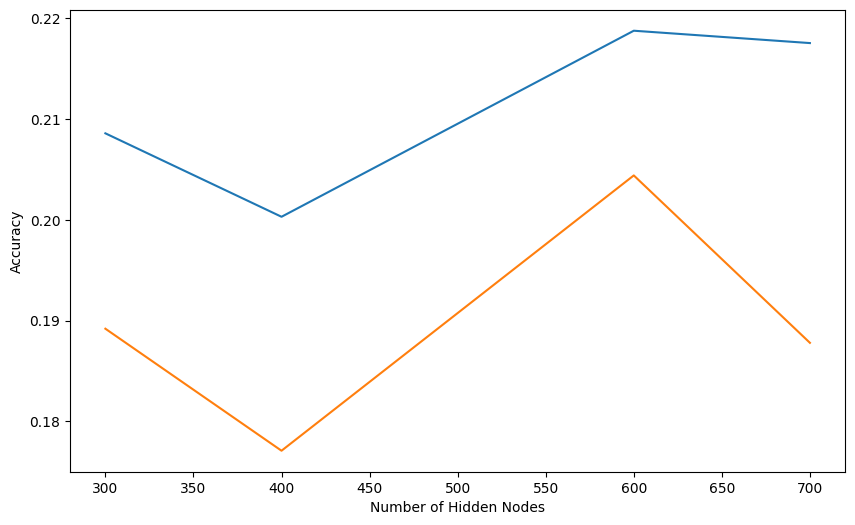

In [151]:
# Your code here
################################################################################### experiment 1:300, 120
def train(hidden_nodes1, hidden_nodes2):
    model = models.Sequential()
    model.add(layers.Input((32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hidden_nodes1, activation='relu'))
    model.add(layers.Dense(hidden_nodes2, activation='relu'))
    model.add(layers.Dense(100, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_original, y_train, epochs=10, batch_size=32, validation_split=0.2)

    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    return train_accuracy, val_accuracy


hidden_nodes_list = [300, 400, 600, 700]
hidden_nodes_list1 = [120, 150, 250, 300]
train_acc_list = []
val_acc_list = []

for i in range(4):
    train_acc, val_acc = train(hidden_nodes_list[i], hidden_nodes_list1[i])
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    print(f'Hidden nodes: {hidden_nodes_list[i]},Hidden nodes: {hidden_nodes_list1[i]}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(hidden_nodes_list, train_acc_list, label='Train Accuracy')
plt.plot(hidden_nodes_list, val_acc_list, label='Validation Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.show()


## 4.3 Average Precision based on Training set

Generate a plot that shows average precision for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until
you use the entire training set. Keep the network hyperparameters constant during your experiments.

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.0136 - loss: 4.6869 - val_accuracy: 0.0420 - val_loss: 4.2966
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.0504 - loss: 4.2226 - val_accuracy: 0.0675 - val_loss: 4.1068
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.0764 - loss: 4.0089 - val_accuracy: 0.0800 - val_loss: 4.0549
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.0993 - loss: 3.8536 - val_accuracy: 0.0840 - val_loss: 4.0354
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.1197 - loss: 3.7657 - val_accuracy: 0.1105 - val_loss: 3.9213
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.1374 - loss: 3.6137 - val_accuracy: 0.1245 - val_loss: 3.8743
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.1603 - loss: 3.5210 - val_accuracy: 0.1280 - val_loss: 3.8628
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.1606 - loss: 3.4664 - 

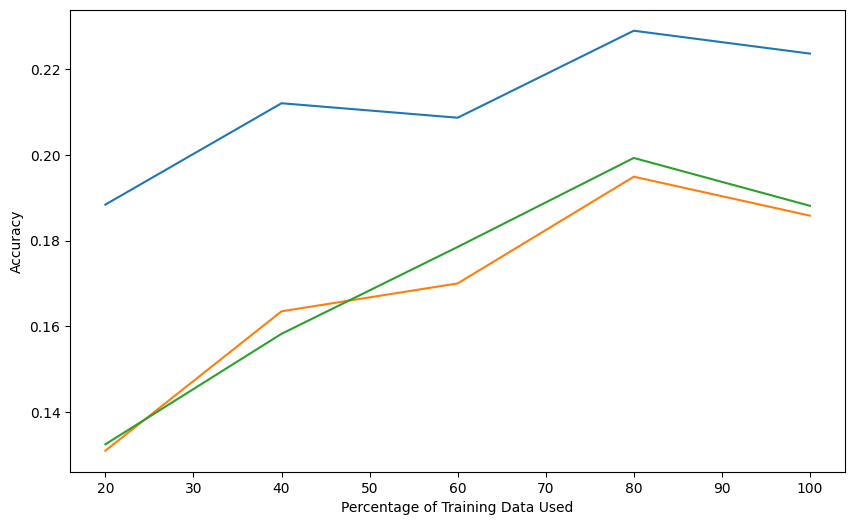

In [48]:
# Your code here
def train(x, y, x_test, y_test1):
    model = models.Sequential()
    model.add(layers.Input((32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(600, activation='relu'))
    model.add(layers.Dense(250, activation='relu'))
    model.add(layers.Dense(100, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x, y, epochs=10, batch_size=32, validation_split=0.2)

    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    score = model.evaluate(x_test, y_test1)
    return train_accuracy, val_accuracy, score[1]

#x_train_original, y_train
#model.evaluate(x_test_original, y_test)

train_acc_list = []
val_acc_list = []
test_acc_list = []
train_val = x_train_original.shape[0]
test_val = x_test_original.shape[0]
#train_indices = np.arange(train_val)
#test_indices = np.arange(test_val)
fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
for frac in fractions:
  train_size = int(train_val * frac)
  test_size = int(test_val * frac)

  train_indices = np.random.choice(np.arange(train_val), size=train_size, replace=False)
  test_indices = np.random.choice(np.arange(test_val), size=test_size, replace=False)

  x_train, y_train1 = x_train_original[train_indices], y_train[train_indices]
  x_test, y_test1 = x_test_original[test_indices], y_test[test_indices]

  train_acc, val_acc, test_acc = train(x_train, y_train1,x_test, y_test1)

  print(f'Percentage: {frac}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

  train_acc_list.append(train_acc)
  val_acc_list.append(val_acc)
  test_acc_list.append(test_acc)

list1=[20,40,60,80,100]
plt.figure(figsize=(10, 6))
plt.plot(list1, train_acc_list, label='Train Accuracy')
plt.plot(list1, val_acc_list, label='Validation Accuracy')
plt.plot(list1, test_acc_list, label='Test Accuracy')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.show()


## 4.4 Best Neural Network?

Define the best network architecture from your experiments above and report the accuracy and average precision for all classes.

### 4.4 Answer


**The best network from my experment is network No.3. It has 600 nodes in the first layer, and 250 nodes in the second layer. The accuracy is 21.88%. And validation accuracy is 20.44%**

Here's the test values and the table:
<br><br>

Hidden nodes: 300,Hidden nodes: 120, Train Accuracy: 0.20857499539852142, Validation Accuracy: 0.1891999989748001

Hidden nodes: 400,Hidden nodes: 150, Train Accuracy: 0.20029999315738678, Validation Accuracy: 0.17710000276565552

Hidden nodes: 600,Hidden nodes: 250, Train Accuracy: 0.21875, Validation Accuracy: 0.20440000295639038

Hidden nodes: 700,Hidden nodes: 300, Train Accuracy: 0.21752500534057617, Validation Accuracy: 0.18780000507831573

(The LATEX just won't work here. It worked on overleaf. Here's the screenshot from overleaf)<br>


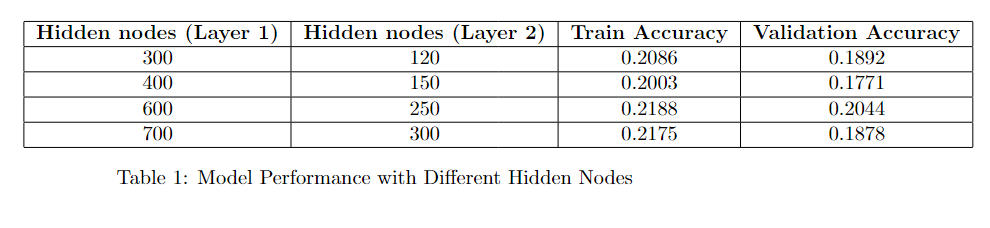

## 4.5 Ensenble of Neural Networks

Can you improve test prediction performance by using an ensemble of neural networks? Explain with words (don't implement!)

### 4.5 Answer

Yes. According to my experments, **a neron network with about 600 nodes in layer 1, about 250 nodes in layer 2, with about 80% data** in the train set will improve the performance of this specific model. Too little and too much nodes both reduces the performance, and too much data in the training set also reduces the performance according to the graph I created in 4.2 and 4.3. So the neron netowrk needs proper amount of nodes and training values.